### 1. Gradient Descent

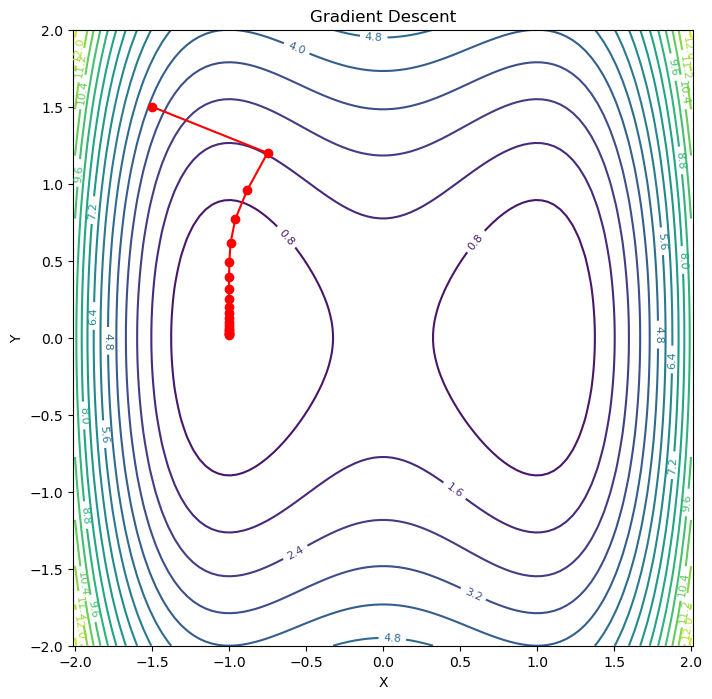

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return  (x**2 - 1)**2 + y**2

def grad_f(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

def gradient(x0, eta, n_iter):
    points = [x0]
    values = [f(*x0)]

    x = x0
    for i in range(n_iter):
        x = x - eta * grad_f(*x)
        points.append(x)
        values.append(f(*x))

    return np.array(points), np.array(values)

if __name__ == '__main__':
    
    x0 = np.array([-1.5, 1.5])
    eta = 0.1
    n_iter = 20

    points, values = gradient(x0, eta, n_iter)

    xx, yy = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(xx, yy)
    Z = f(X, Y)

    fig, ax = plt.subplots(figsize=(8, 8))
    cs = ax.contour(X, Y, Z, cmap='viridis', levels=20)
    ax.clabel(cs, inline=True, fontsize=8)

    ax.plot(points[:, 0], points[:, 1], color='r', marker='o')
    ax.set_title('Gradient Descent')
    ax.set_xlabel('X')
    ax.set_ylabel('Y') 
    ax.axis('equal')
    plt.show()

### 2. Stochastic Gradient Descent

The final theta is:
 [[0.03931885]
 [0.01194448]
 [1.03866379]
 [1.04021309]]


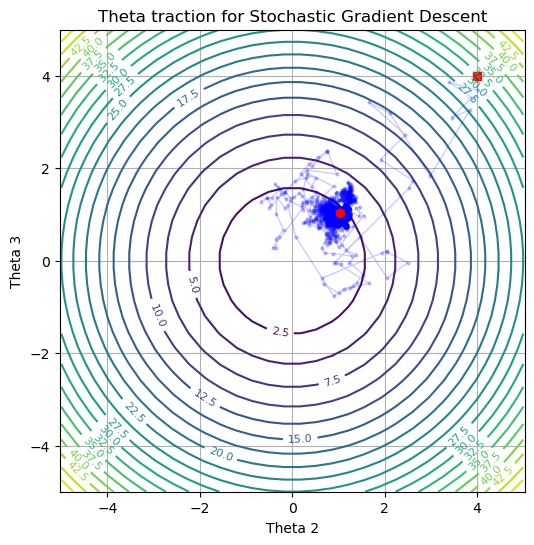

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2

x_flat, y_flat, z_flat = xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1), zz.flatten().reshape(-1, 1)
X = np.hstack((x_flat, y_flat,x_flat**2, y_flat**2))

# data standarization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

t0, t1 = 5, 50
n_epochs = 50
m = X.shape[0]

theta = np.array([0, 0, 4, 4]).reshape(-1, 1) * X_std.reshape(-1, 1) # size (4, 1)
thetas = [theta.copy()]

def learning_rate(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m)
        xi = X_scaled[rand_idx: rand_idx + 1]
        yi = z_flat[rand_idx: rand_idx + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # size (4, 1)
        eta = learning_rate(epoch * m + i)
        theta = theta - eta * gradients
        thetas.append(theta.copy())

print(f'The final theta is:\n {theta / X_std.reshape(-1, 1)}')

# extracting the thetas tracking values for X_scaled[:, 2] & X_scaled[:, 3]
thetas_arr = np.array(thetas).flatten().reshape(-1, 4) / X_std
th0, th1, th2, th3 = thetas_arr[:, 0], thetas_arr[:, 1], thetas_arr[:, 2], thetas_arr[:, 3]

fig, ax = plt.subplots(figsize=(6, 6))
cs = ax.contour(xx, yy, zz, cmap='viridis', levels=20)
ax.clabel(cs, inline=True, fontsize=8)

ax.plot(th2, th3, c='b', marker='o', markersize=2, alpha=0.2, linewidth=1)
ax.set_xlabel('Theta 2')
ax.set_ylabel('Theta 3')
ax.set_title('Theta traction for Stochastic Gradient Descent')

ax.axis('equal')

# the starting theta coordinates
ax.plot(th2[:1], th3[:1], 'rs')

# the final theta coordinates
ax.plot(th2[-1:], th3[-1:], 'ro')

plt.grid()
plt.show()

In [11]:
# Normal equation
theta_norm = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(z_flat))
theta_norm

array([[2.12704406e-16],
       [3.06294345e-15],
       [1.00000000e+00],
       [1.00000000e+00]])